In [1]:
from skimage.transform import radon, iradon
import numpy as np
from skimage.draw import ellipse
import matplotlib.pyplot as plt
from scipy.io import loadmat
from pathlib import Path
from image_utils import *

%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
N=251
I_0 = 1e4
theta = np.linspace(0, 180, 360, endpoint=False)

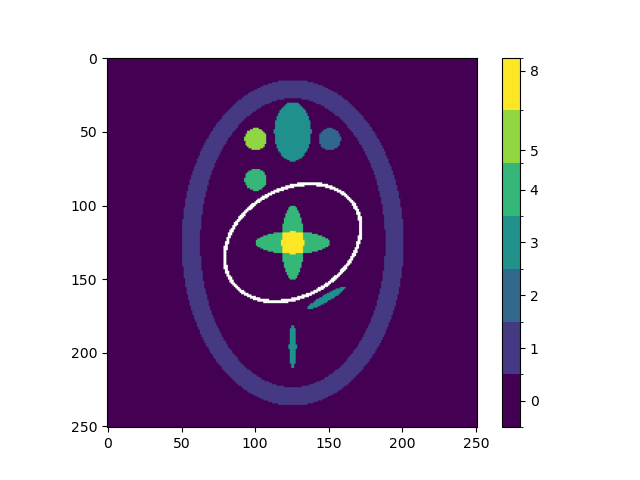

In [4]:
X = make_rocket_phantom2(N=N)
discrete_imshow(X)

/zhome/e2/d/117429/Desktop/s164564/miniconda3/envs/cil/lib/python3.12/site-packages/matplotlib/colors.py:783: RuntimeWarning: invalid value encountered in less
  mask_under = xa < 0
/zhome/e2/d/117429/Desktop/s164564/miniconda3/envs/cil/lib/python3.12/site-packages/matplotlib/colors.py:784: RuntimeWarning: invalid value encountered in greater_equal
  mask_over = xa >= self.N


<Figure size 704x528 with 0 Axes>

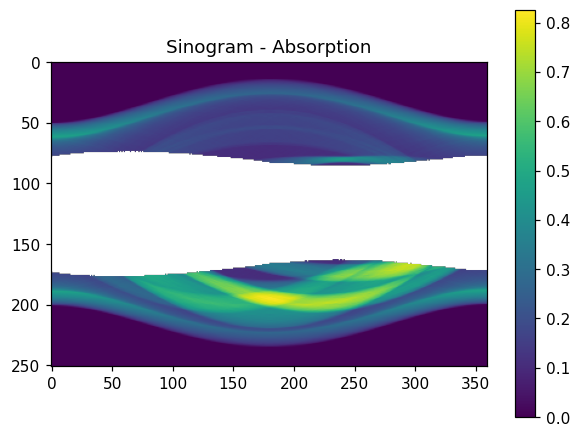

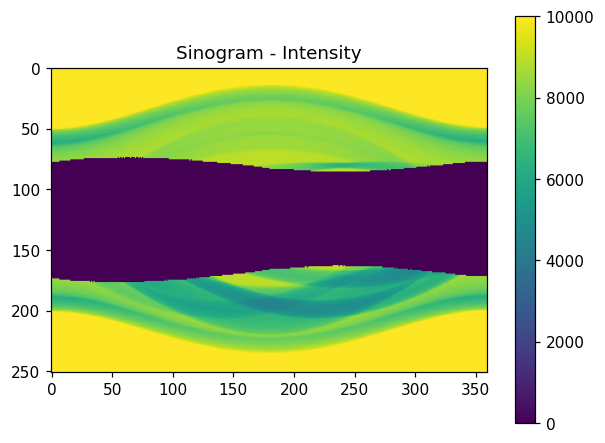

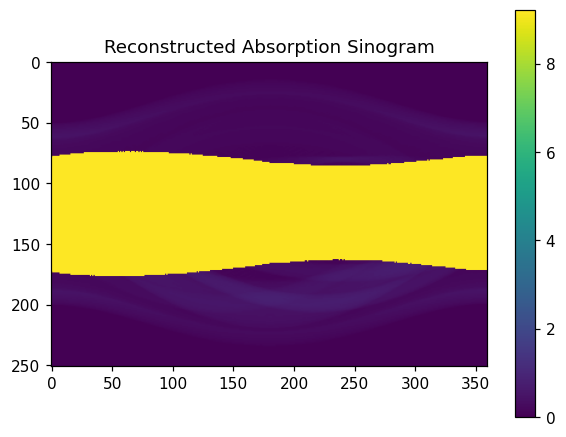

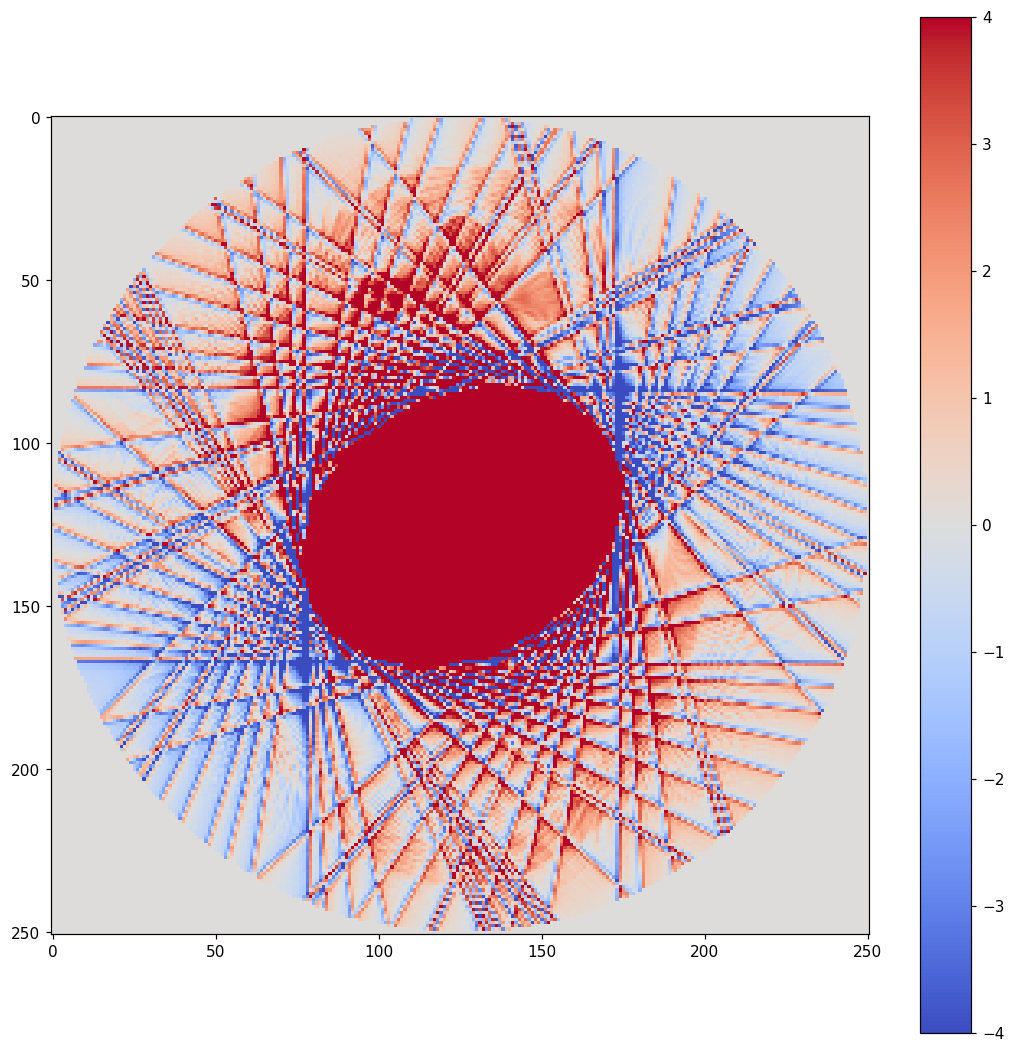

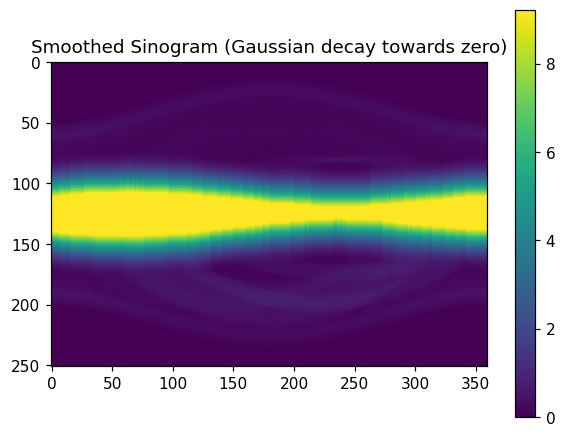

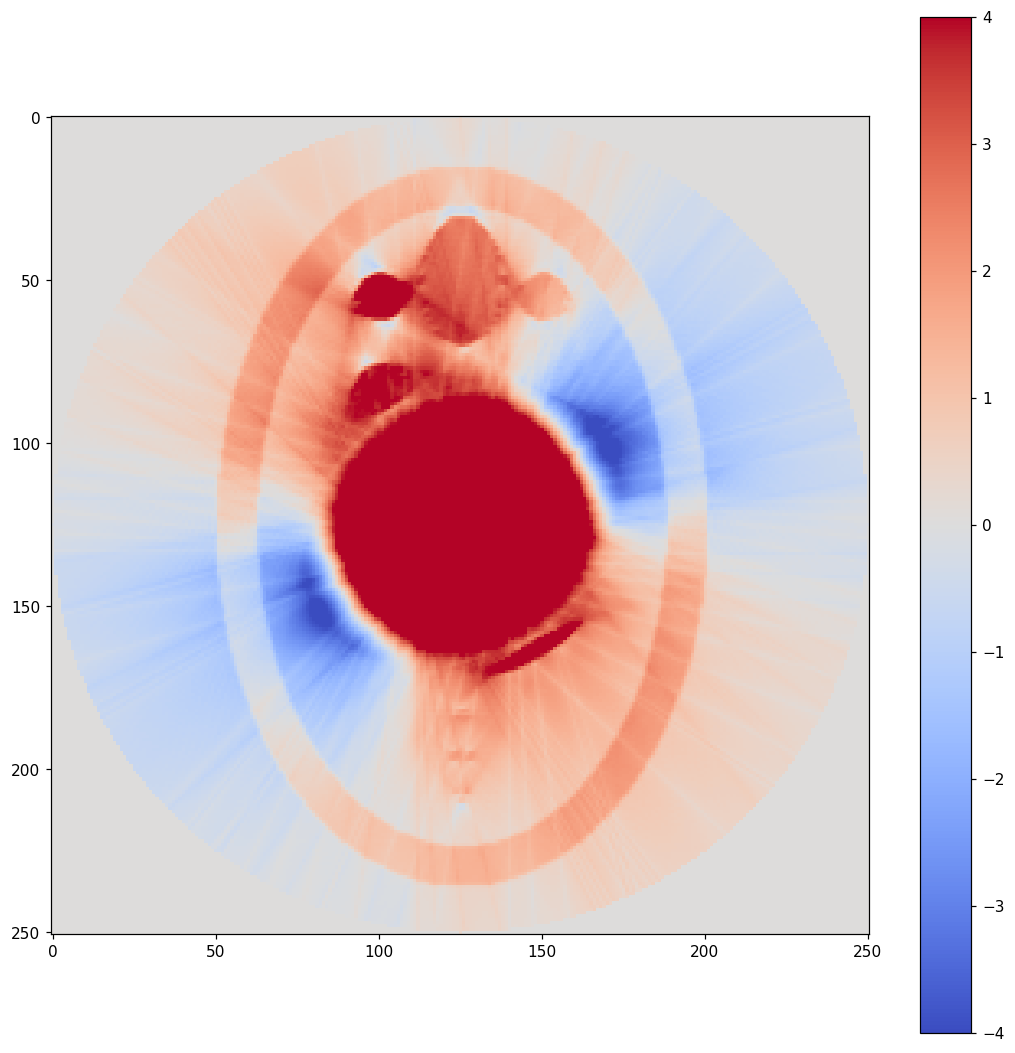

In [80]:
I_0 = 1e4
theta = np.linspace(0, 180, 360, endpoint=False)

plt.figure()
A = radon(X, theta=theta) / N
I = I_0*np.exp(-A)
I = np.nan_to_num(I, copy=False, nan=0.0)

plt.figure()
plt.imshow(A)
plt.title("Sinogram - Absorption")
plt.colorbar()

plt.figure()
plt.imshow(I)
plt.title("Sinogram - Intensity")
plt.colorbar()

A_recon = -np.log(np.maximum(I, 1)) + np.log(I_0)

plt.figure()
plt.imshow(A_recon)
plt.title("Reconstructed Absorption Sinogram")
plt.colorbar()

X_recon = iradon(A_recon, theta=theta, output_size=N,)*N
# discrete_imshow(X_recon)

# X_recon[X_recon < 0] = 0.0  # Clip negative values for better visualization

plt.figure(figsize=(12, 12))
plt.imshow(X_recon,vmax=4,vmin=-4,cmap="coolwarm")
plt.colorbar()

# Try trick to get smoothened sinogram
I_smoothed = smooth_zero_center(I, sigma=8)

sinogram_smoothed = -np.log(np.maximum(I_smoothed, 1)) + np.log(I_0)

plt.figure()
plt.imshow(sinogram_smoothed)
plt.colorbar()
plt.title("Smoothed Sinogram (Gaussian decay towards zero)")

X_recon = iradon(sinogram_smoothed, theta=theta, output_size=N,)*N
# discrete_imshow(X_recon)

#X_recon[X_recon < 0] = 0.0  # Clip negative values for better visualization

plt.figure(figsize=(12, 12))
plt.imshow(X_recon, vmax=4.0,vmin=-4,cmap="coolwarm")
plt.colorbar()


<Figure size 704x528 with 0 Axes>

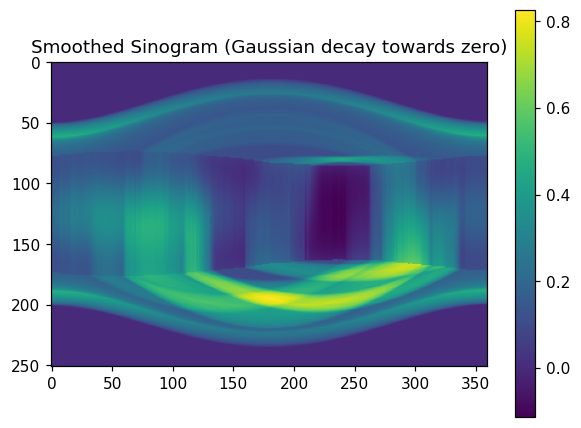

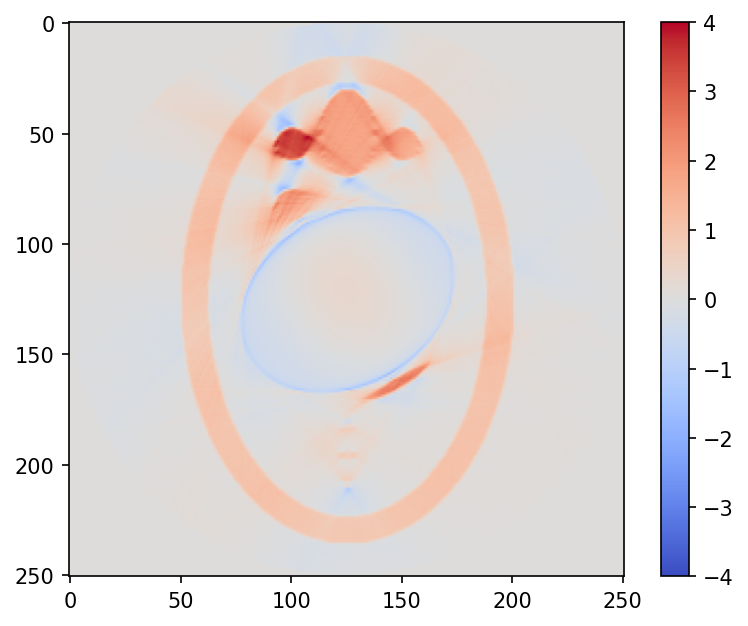

In [81]:
I_0 = 1e4
theta = np.linspace(0, 180, 360, endpoint=False)
plt.figure()
A = radon(X, theta=theta) / N
I = I_0*np.exp(-A)
I = np.nan_to_num(I, copy=False, nan=0.0)
A_recon = -np.log(np.maximum(I, 1)) + np.log(I_0)
# Try trick to get smoothened sinogram
I_smoothed = smooth_zero_center(I, sigma=40)
sinogram_smoothed = -np.log(np.maximum(I_smoothed, 1)) + np.log(I_0)
X_recon = iradon(sinogram_smoothed, theta=theta, output_size=N,)*N

plt.figure()
plt.imshow(sinogram_smoothed)
plt.colorbar()
plt.title("Smoothed Sinogram (Gaussian decay towards zero)")

plt.figure(dpi=150)
plt.imshow(X_recon, vmax=4.0,vmin=-4,cmap="coolwarm")
plt.colorbar()

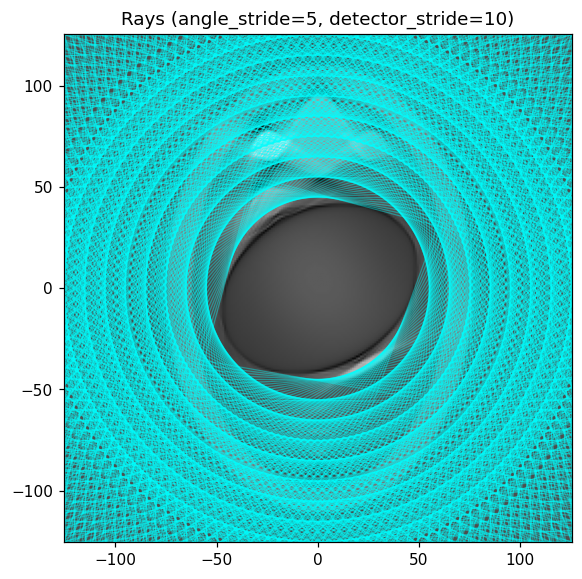

In [86]:
ax = plot_radon_rays_skimage(
    img=X_recon,                          # your phantom
    sinogram=I,                     # intensity sinogram
    theta_deg=theta,                # degrees, 0..180-Δ
    threshold=0.0,
    angle_stride=5,                 # ← draw only every 5th angle
    detector_stride=10,             # ← draw only every 10th detector pixel
    linewidth=0.8,
    alpha=0.4,
    color='cyan'
)
plt.show()

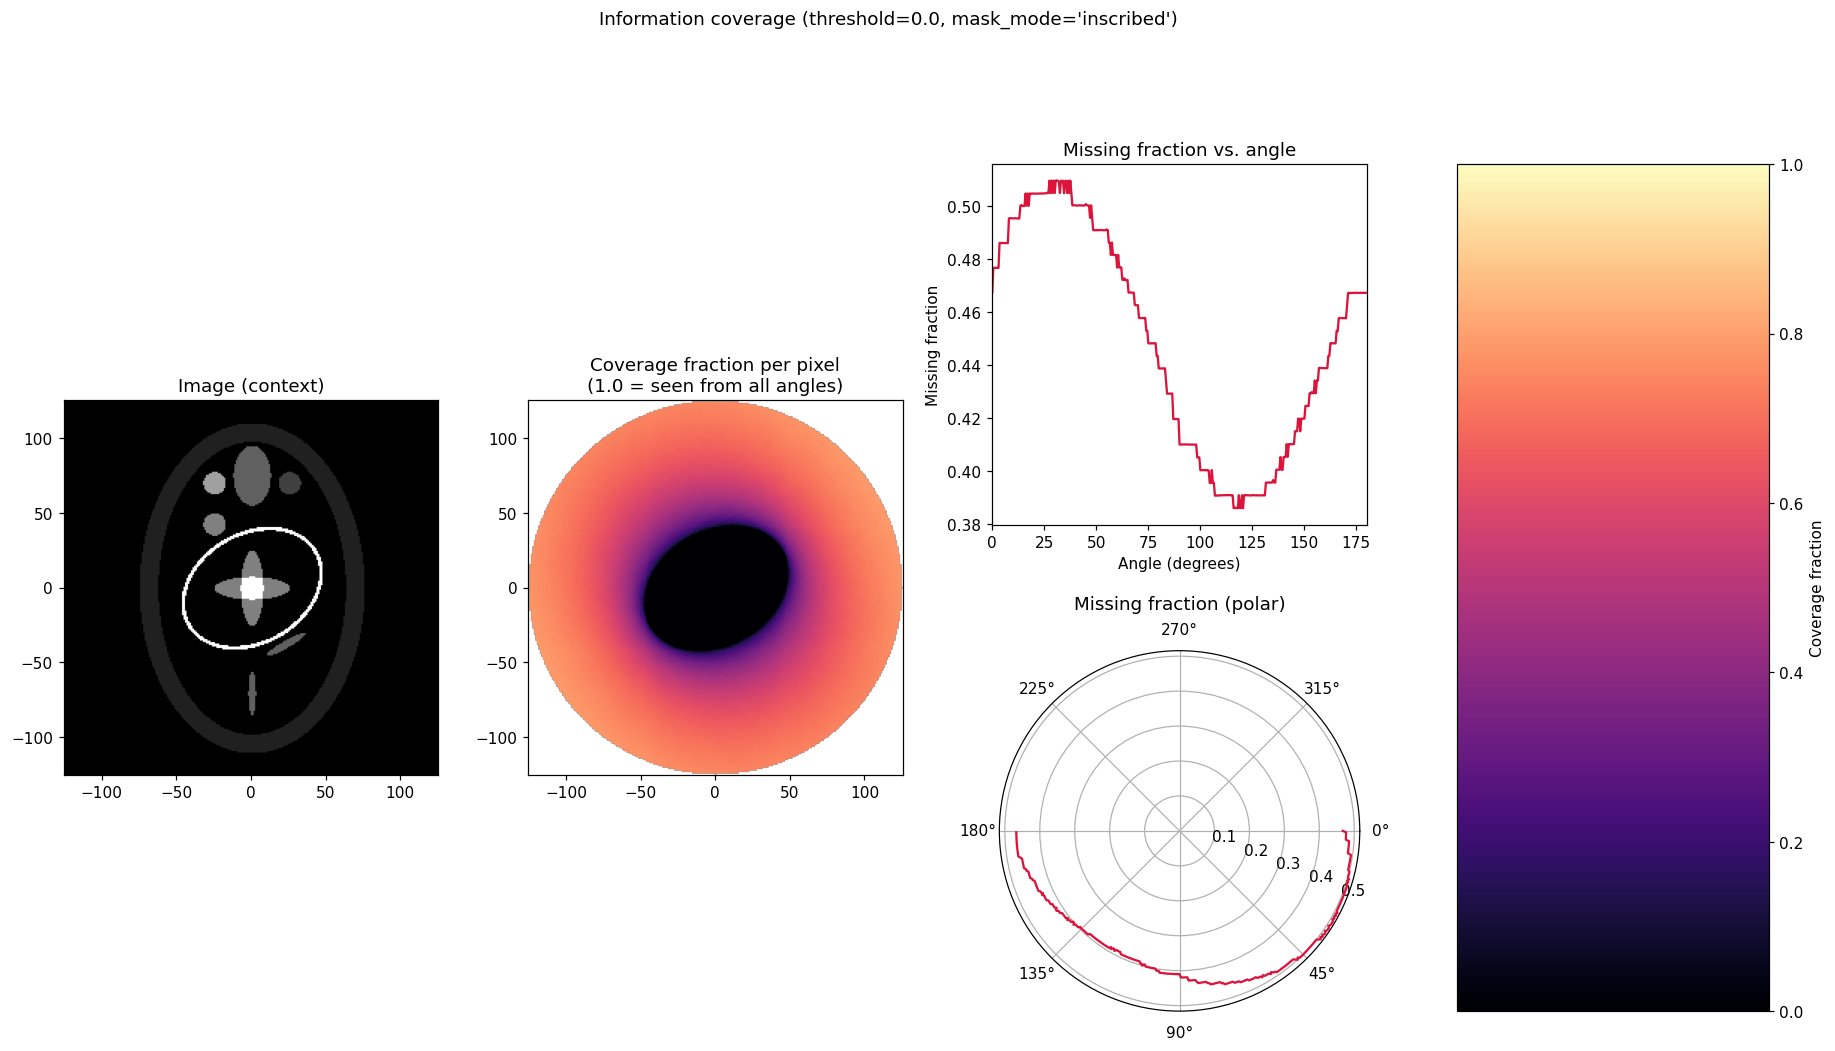

In [49]:
out = plot_missing_information(
    img=X,
    sinogram=I,
    theta_deg=theta,
    threshold=0.0,        # Raise slightly (e.g., 1e-6) if you have tiny nonzero noise
    mask_mode='inscribed' # or 'none' if you want full square
)
plt.show()

# Access the arrays if you want:
cov_frac = out["coverage_fraction"]       # per-pixel fraction in [0,1]
missing_by_angle = out["missing_by_angle"]# per-angle missing fraction in [0,1]


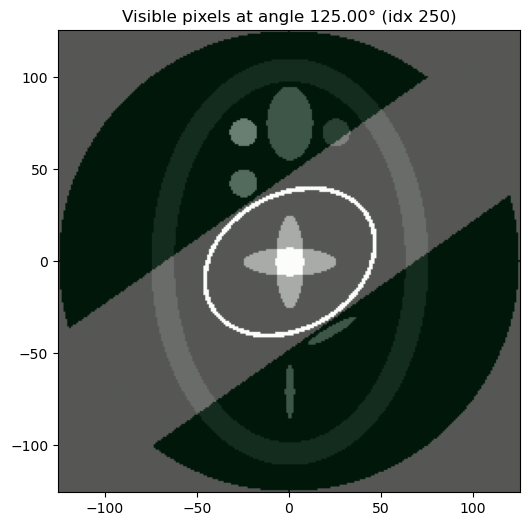

In [28]:
# Visibility for a single angle:
_ = plot_visible_mask_for_angle(X, I, theta, angle=125.0, threshold=0.0, mask_mode='inscribed')
plt.show()

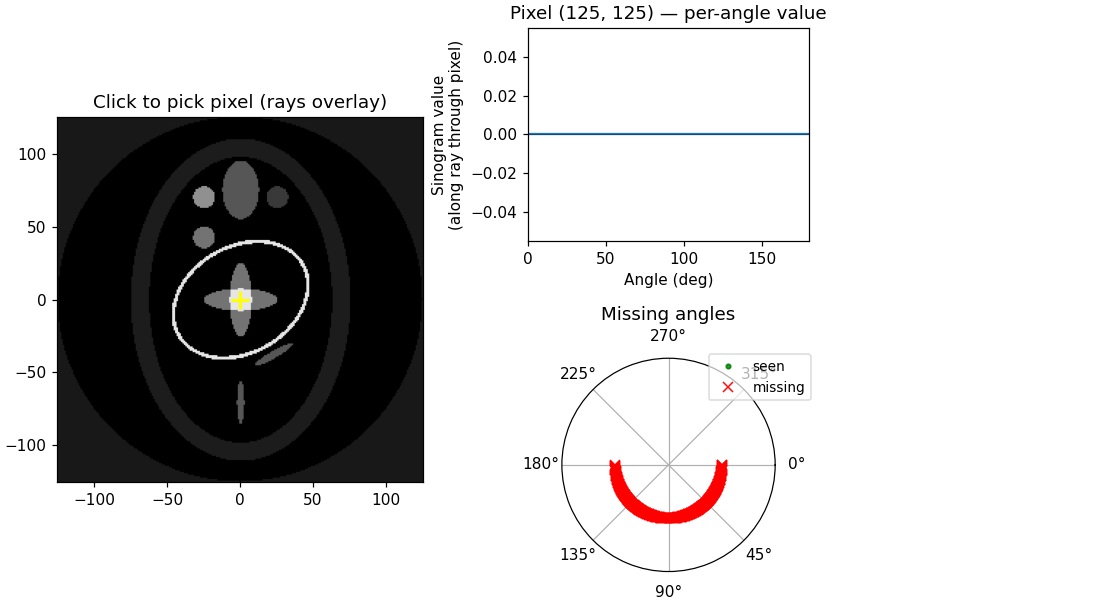

In [63]:
# Choose an interactive backend (recommended)
%matplotlib widget

fig = interactive_missing_angles_picker(
    img=X,
    sinogram=I,
    theta_deg=theta,
    threshold=0.0,
    angle_stride_overlay=5,
    show_missing_rays=False
)
plt.show()

In [64]:
plt.close("all")
%matplotlib inline

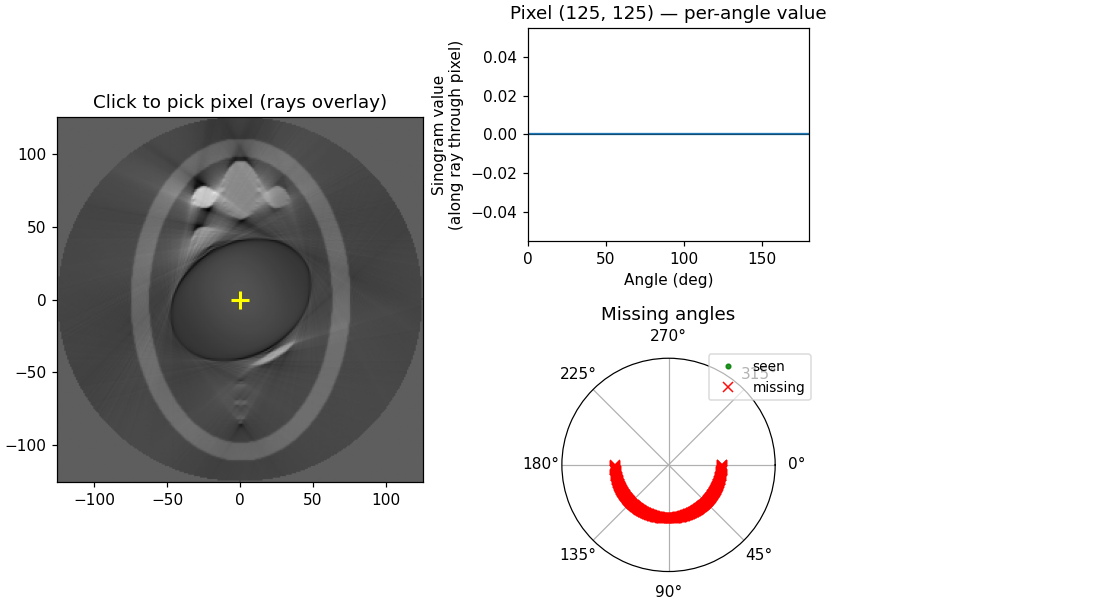

In [65]:
# Choose an interactive backend (recommended)
%matplotlib widget

fig = interactive_missing_angles_picker(
    img=X_recon,
    sinogram=I,
    theta_deg=theta,
    threshold=0.0,
    angle_stride_overlay=5,
    show_missing_rays=False
)
plt.show()

In [66]:
plt.close("all")
%matplotlib inline